# Housing price prediction

### by Ezedin Mohammed , 
###Michigan Tech, Spring 2023

In [119]:
import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor





#Data exploration

In [34]:
# Read the data
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')




In [35]:
# print first five rows
train.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:

# column names
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:
# columns with null values
train_col_null = train.columns[train.isnull().any()==True].tolist()
# null values in these columns
train[train_col_null].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [38]:
# print first five rows
test.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
# column names
test.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<ipython-input-40-57f8a3fe5c57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


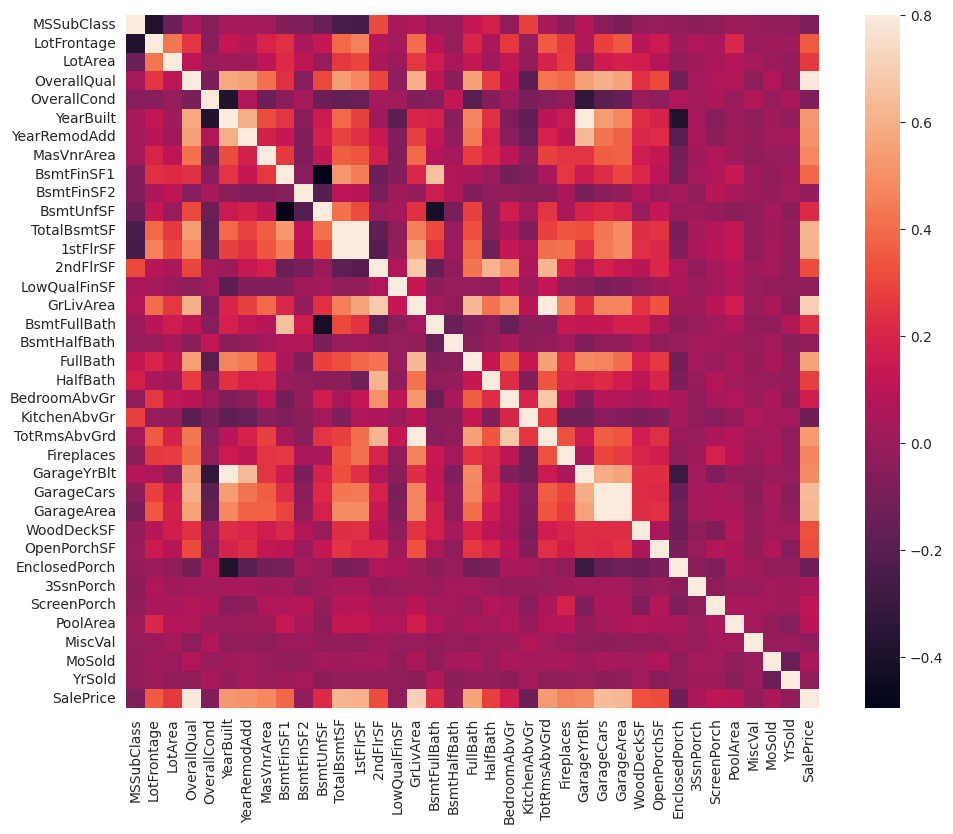

In [40]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

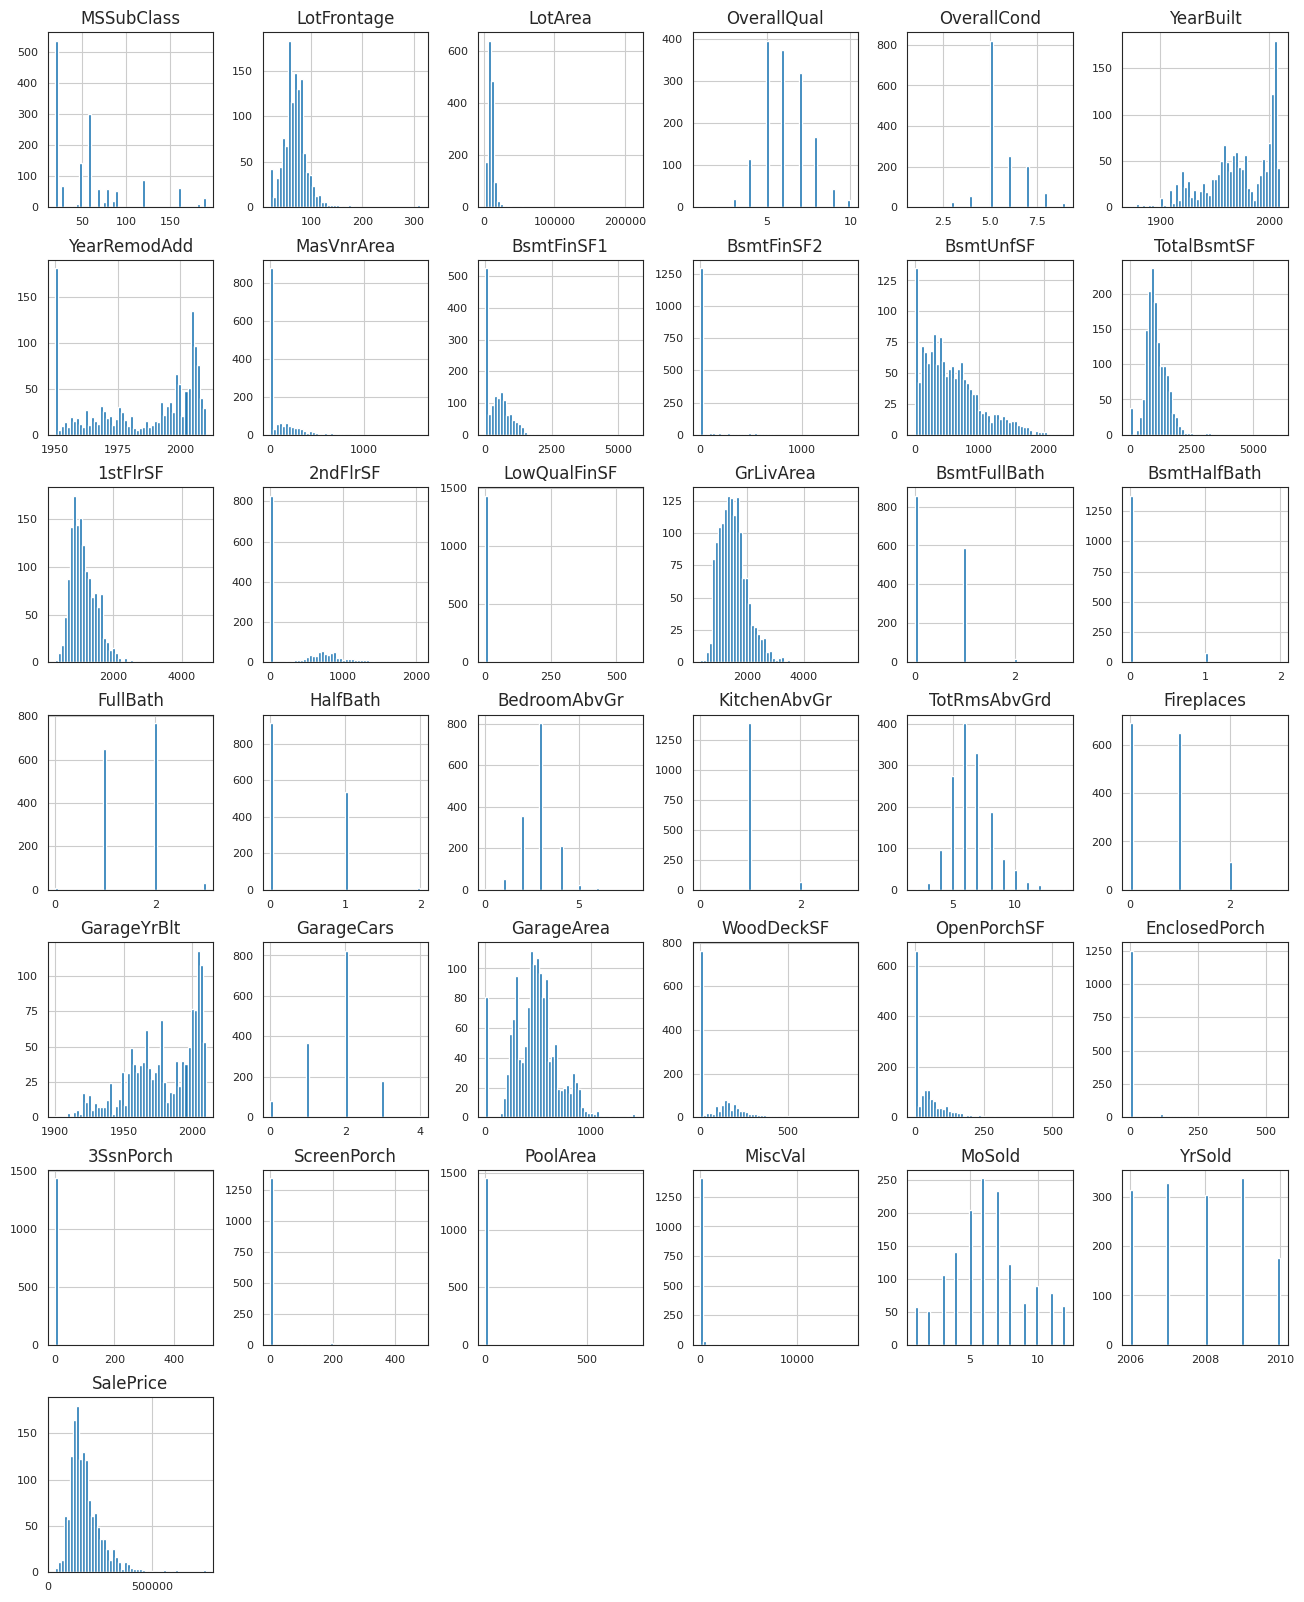

In [41]:
#  All data distribution
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<ipython-input-42-4c2bf76c2ab2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color="b");


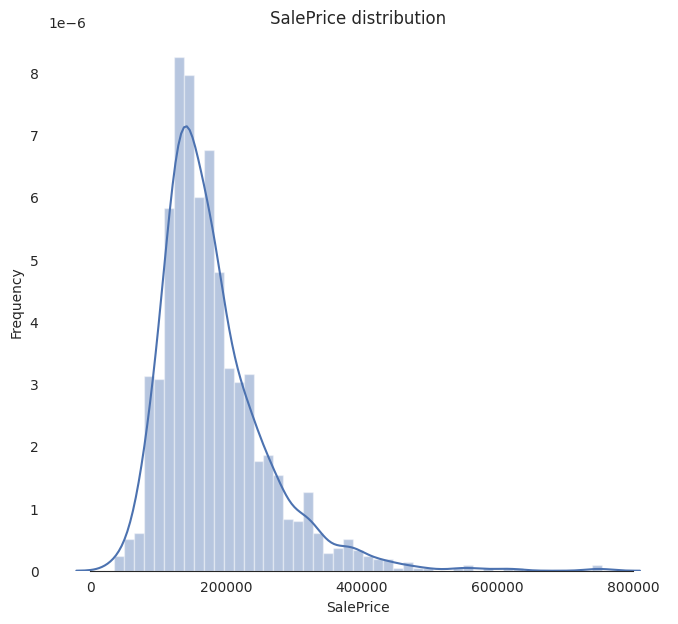

In [42]:
# sales distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [43]:
# columns with null values
test_col_null = test.columns[test.isnull().any()==True].tolist()
# null values in these columns
test[test_col_null].isnull().sum()


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

#Data preprocessing

In [134]:

from sklearn.impute import SimpleImputer

# Remove rows with missing target
X = train.dropna(axis=0, subset=['SalePrice'])

# create new total area columns

X['TotalArea'] = X[['LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
].sum(axis=1)


# separate target from predictors
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

#  mean of NA values , mode of categorical values

# Split into categorical and numerical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Impute categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_features] = cat_imputer.fit_transform(X[cat_features])

# Impute numerical features with mean
num_imputer = SimpleImputer(strategy='mean')
X[num_features] = num_imputer.fit_transform(X[num_features])

print("X cols",len(X.columns))


#  for test data
# Remove rows with missing target
Xt = test.copy()
# create new total area columns
Xt['TotalArea'] = Xt[['LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
].sum(axis=1)      
#  mean of NA values , mode of categorical values

# Split into categorical and numerical features
tcat_features = Xt.select_dtypes(include=['object']).columns.tolist()
tnum_features = Xt.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Impute categorical features with mode
tcat_imputer = SimpleImputer(strategy='most_frequent')
Xt[tcat_features] = tcat_imputer.fit_transform(Xt[tcat_features])

# Impute numerical features with mean
tnum_imputer = SimpleImputer(strategy='mean')
Xt[tnum_features] = tnum_imputer.fit_transform(Xt[tnum_features])

print("Xt columns",len(Xt.columns))







X cols 80
Xt columns 80


In [135]:
# Break off validation set from training data


X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y,
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=0)
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)

low_cardinality_cols = [cname for cname in X_train_full.columns 
                        if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns
                if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
# print('my cols',my_cols)
# print('xt cols',Xt.columns)

# print("xt length",len(Xt.columns))

# print("mycols length",len(my_cols))


X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
Xt = Xt[my_cols].copy()



# for test data also
# X_test = Xt[my_cols].copy()
# One-hot encode the data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
Xt = pd.get_dummies(Xt)



X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, Xt = X_train.align(Xt, join='left', axis=1)
Xt = Xt.fillna(0)
X_valid = X_valid.fillna(0)
print("xtrain",len(X_train.columns))
print("xtest",len(Xt.columns))

# print("xtrain",X_train.columns)
# print("xtest",Xt.columns)




xtrain 228
xtest 228


#Model building and parameter testing


##Linear Regressor model

In [163]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_valid)
linreg_mse = mean_squared_error(y_valid, linreg_pred)
linreg_rmse = linreg_mse**0.5
print("liner reg rmse error ",linreg_rmse)



liner reg rmse error  62095.299414243906


##Lasso regression model

In [164]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_valid)
lasso_rmse = mean_squared_error(y_valid, lasso_pred)**0.5

print("lasso reg error ",lasso_rmse)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+11, tolerance: 5.798e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 5.678e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+11, tolerance: 5.598e+08

lasso reg error  58888.73023445431


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


## Ridge regression

In [165]:

# Ridge Regression with GridSearchCV
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_valid)
ridge_rmse = mean_squared_error(y_valid, ridge_pred)**0.5
print("ridge reg error ",ridge_rmse)

ridge reg error  47345.18410425877


##XGBRegressor model

In [46]:
from sklearn.model_selection import GridSearchCV
regressor=XGBRegressor(eval_metric='rmsle')
# set up our search grid
param_grid = {"max_depth":    [4,5,6],
              "n_estimators": [500,600,700],
              "learning_rate": [0.01,0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


In [157]:
# # Define the model
# xgb =  XGBRegressor(n_estimators=1000,
#                     learning_rate=0.01,max_depth=8,)
xgb=XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')
# Fit the model
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [166]:
# Get predictions
y_pred_xgb = xgb.predict(X_valid)
# Calculate Mse

xgb_rmse = mean_squared_error(y_pred_xgb,y_valid)**0.5
print('XGB root Mean squared Error:', xgb_rmse)

XGB root Mean squared Error: 32927.71526409189


## Random forrest

In [167]:

# Random Forest Regression with GridSearchCV
rf = RandomForestRegressor()
params = {'n_estimators': [100,150,300],
          'max_depth': [5,10,15],
          'max_features': ['sqrt', 'log2']}
rf_cv = GridSearchCV(rf, params, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",rf_cv.best_params_)

rf_pred = rf_cv.predict(X_valid)
rf_rmse = mean_squared_error(y_valid, rf_pred)**0.5
print("Random forrest rmse error ",rf_rmse)

The best hyperparameters are  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}
Random forrest rmse error  34234.242340782366


## Gaussian Naive Bayes

In [168]:
from sklearn.naive_bayes import GaussianNB


# train the model
Naivemodel = GaussianNB()
Naivemodel.fit(X_train, y_train)

# make predictions on the test set
NB_y_pred = Naivemodel.predict(X_valid)

# calculate the mean squared error of the predictions
NB_rmse = mean_squared_error(y_valid, NB_y_pred)**0.5
print('Naive  bayes error:', NB_rmse)


Naive  bayes error: 56948.15859928497


#Comparison

In [171]:
# Print Mean Squared Error and Best Parameters
print("Linear Regression rMSE: ", linreg_rmse)

print("Lasso Regression rMSE: ", lasso_rmse)
print("Best Lasso Parameters: ", lasso_cv.best_params_)

print("Ridge Regression rMSE: ", ridge_rmse)
print("Best Ridge Parameters: ", ridge_cv.best_params_)

print("XGBRegressor rMSE: ", xgb_rmse)
print("Best XGBRegressor Parameters: ", search.best_params_)

print("Random Forest Regression rMSE: ", rf_rmse)
print("Best Random Forest Parameters: ", rf_cv.best_params_)

print("Naivebaye Regression rMSE: ", NB_rmse)


Linear Regression rMSE:  62095.299414243906
Lasso Regression rMSE:  58888.73023445431
Best Lasso Parameters:  {'alpha': 10}
Ridge Regression rMSE:  47345.18410425877
Best Ridge Parameters:  {'alpha': 10}
XGBRegressor rMSE:  32927.71526409189
Best XGBRegressor Parameters:  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}
Random Forest Regression rMSE:  34234.242340782366
Best Random Forest Parameters:  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}
Naivebaye Regression rMSE:  56948.15859928497


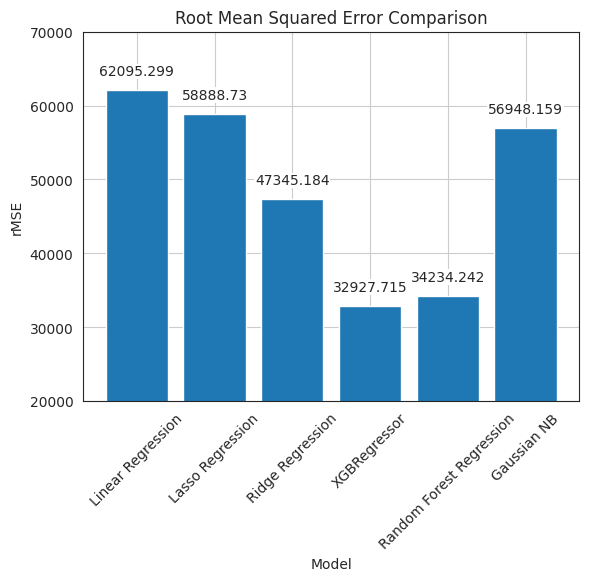

In [188]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'XGBRegressor', 'Random Forest Regression','Gaussian NB']
mse = [linreg_rmse, lasso_rmse, ridge_rmse, xgb_rmse, rf_rmse,NB_rmse]

# Create bar plot
plt.bar(models, mse)

# Add number labels
for i in range(len(models)):
    plt.text(models[i], mse[i]+2000, round(mse[i], 3), ha='center', fontsize=10,bbox=dict(facecolor='white', edgecolor='none', pad=0.5))



# Set plot properties
plt.title('Root Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('rMSE')
plt.ylim(20000,top=70000)

plt.xticks(rotation=45)
plt.grid()
# Show plot
plt.show()

# Submit predictions

In [162]:
# prediction
linprediction = linreg.predict(Xt)
laprediction = lasso_cv.predict(Xt)
riprediction = ridge_cv.predict(Xt)
XGprediction = xgb.predict(Xt)
rfprediction = rf_cv.predict(Xt)
NBprediction = Naivemodel.predict(Xt)


# Submission best  file
XGoutput = pd.DataFrame({'Id': Xt.index, 'SalePrice': XGprediction})
XGoutput.to_csv('XGsubmission.csv', index=False)
